# Getting started example

The base interface of `PyZEAL` is the `RootFinder`. To get started, import
`RootFinder` from `pyzeal.rootfinders` and provide it with a target function.
To calculate roots, you need to call `calculateRoots` with a search range. If
you have not changed the default estimator, this will work without the
derivative of the target function.

calculated roots:  [-0.55705+0.j       0.13513+0.62178j  0.13513-0.62178j  0.88679+0.j     ]
root orders     :  [1 1 1 1]


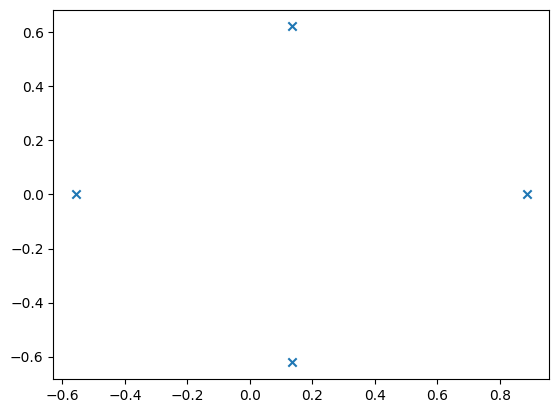

In [1]:
from matplotlib import pyplot as plt
from pyzeal.rootfinders import RootFinder


def f(x):
    return 5 * x**4 - 3 * x**3 - 1


rf = RootFinder(f)
rf.calculateRoots((-10, 10), (-5, 5))

plt.scatter(rf.roots.real, rf.roots.imag, marker="x")

print(f"calculated roots:  {rf.roots}")
print(f"root orders     :  {rf.orders}")


Some algorithms do however require the derivative. These may provide better
performance and/or accuracy. For example, to use numerical quadrature, you need
to import `EstimatorTypes` and pass the corresponding type to the rootfinder
during setup. If the derivative is not provided, an error will be raised:

calculated roots:  [-0.58718-0.42313j -0.77467+0.98966j  1.13683+0.55651j  0.22656-0.69109j
 -1.26914+0.j      -0.77467-0.98966j  0.27209+1.21769j  1.13683-0.55651j
 -0.58718+0.42313j  0.27209-1.21769j  0.22656+0.69109j  0.72186+0.j     ]
root orders     :  [1 1 1 1 1 1 1 1 1 1 1 1]


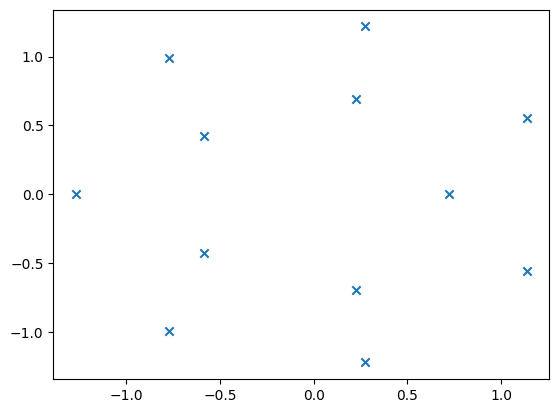

In [2]:
from matplotlib import pyplot as plt
from pyzeal.pyzeal_types.estimator_types import EstimatorTypes
from pyzeal.rootfinders import RootFinder


def f(x):
    return x**12 + 5 * x**5 - 1


def df(x):
    return 12 * x**11 + 25 * x**4


rf = RootFinder(f, df, estimatorType=EstimatorTypes.QUADRATURE_ESTIMATOR)
rf.calculateRoots((-10, 10), (-5, 5))

plt.scatter(rf.roots.real, rf.roots.imag, marker="x")

print(f"calculated roots:  {rf.roots}")
print(f"root orders     :  {rf.orders}")

Additional settings can be passed to either the rootfinder or, depending on the
concrete setting, to `calculateRoots` directly (if you want to apply a setting
specifically for a single computational run only).

Note how in the following example all zero orders are set to 0. This is due to
the `NEWTON_GRID` algorithm not supporting the calculation of orders.

calculated roots:  [ 1.136833+0.55651j   0.226583+0.691124j  0.226583-0.691124j
  0.226568-0.691092j  0.721855+0.j       -0.587175+0.423125j
  0.272094+1.21769j  -0.774675-0.989668j  1.136833+0.556509j
 -0.587109-0.423232j  1.136833-0.55651j   0.272094-1.21769j
  0.226568+0.691092j -0.587175-0.423125j -0.587106+0.423236j
 -0.774675+0.989668j -1.269145+0.j      ]
root orders     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


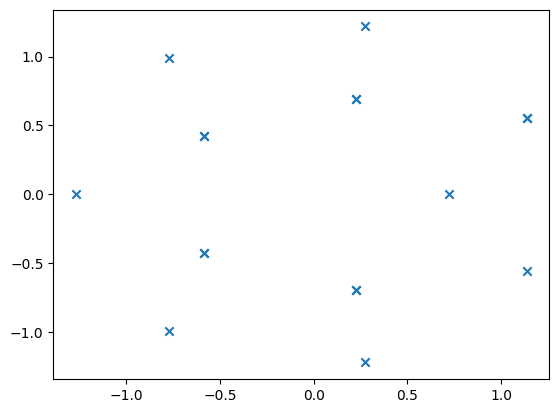

In [3]:
from matplotlib import pyplot as plt
from pyzeal.pyzeal_types.algorithm_types import AlgorithmTypes
from pyzeal.pyzeal_types.container_types import ContainerTypes
from pyzeal.rootfinders import RootFinder


def f(x):
    return x**12 + 5 * x**5 - 1


def df(x):
    return 12 * x**11 + 25 * x**4


rf = RootFinder(
    f,
    df,
    algorithmType=AlgorithmTypes.NEWTON_GRID,
    precision=(3, 3),
    containerType=ContainerTypes.ROUNDING_CONTAINER,
)
rf.calculateRoots((-10, 10), (-5, 5), precision=(6, 6))

plt.scatter(rf.roots.real, rf.roots.imag, marker="x")

print(f"calculated roots:  {rf.roots}")
print(f"root orders     :  {rf.orders}")